# Google Play Store Apps Data Analysis using Python

### Import necessary libraries

In [97]:
from numpy import *
import pandas as pd
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
import seaborn as sns
import matplotlib.pyplot as plt

### Read Dataset

In [98]:
ds = read_csv('googleplaystore.csv')

### 1. Display Top 5 Rows of The Dataset

In [99]:
ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Check Last 5 Rows of The Dataset

In [100]:
ds.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### 3. Find Shape of Dataset 

In [101]:
data_shape = ds.shape
print(data_shape)

(10841, 13)


### 4. Get Information About Our Dataset 

In [102]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


### 5. Total Number of App Belongs to ART_AND_DESIGN Category

In [103]:
category_counts = ds['Category'].value_counts()
art_and_design_count = category_counts['ART_AND_DESIGN']
print("Total number of apps in the ART_AND_DESIGN category:", art_and_design_count)



Total number of apps in the ART_AND_DESIGN category: 65


### 6. Find Average App Rating

In [104]:
ratings = ds['Rating']
average_rating = ratings.mean()
print("Average app rating:", average_rating)

Average app rating: 4.193338315362443


### 7.  Find Total Number of Unique Category

In [105]:
categories = ds['Category']
num_unique_categories = categories.nunique()
print("Total number of unique categories:", num_unique_categories)

Total number of unique categories: 34


### 8. Which Category Getting The Highest Average Rating?(Hint use groupby)

In [106]:
category_avg_rating = ds.groupby('Category')['Rating'].mean()
category_with_highest_rating = category_avg_rating.idxmax()
print("Category with the highest average rating:", category_with_highest_rating)


Category with the highest average rating: 1.9


### 9. Find Total Number of Apps having 5 Star Rating

In [107]:
five_star_apps = ds[ds['Rating'] == 5]
num_five_star_apps = five_star_apps.shape[0]
print("Total number of apps with a 5-star rating:", num_five_star_apps)

Total number of apps with a 5-star rating: 274


### 10. Find Average Value of Reviews

In [108]:
ds['Reviews'] = pd.to_numeric(ds['Reviews'], errors='coerce')
mean_reviews = ds['Reviews'].mean(skipna=True)
print("Mean value of reviews:", mean_reviews)

Mean value of reviews: 444152.89603321033


### 11. Display Total Number of Free and Paid Apps using Countplot

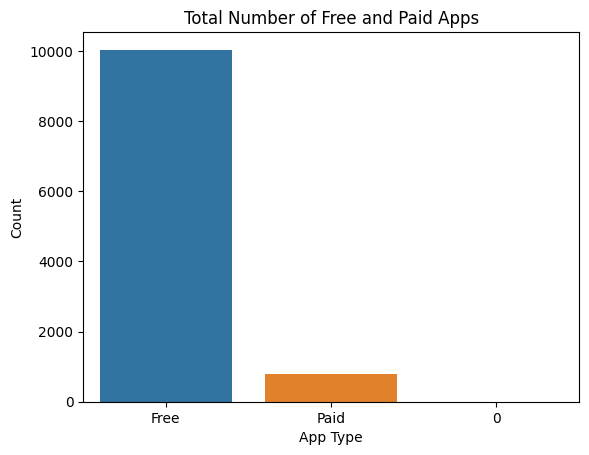

In [109]:
sns.countplot(x='Type', data=ds)
plt.xlabel('App Type')
plt.ylabel('Count')
plt.title('Total Number of Free and Paid Apps')

plt.show()

### 12.  Which App Has Maximum Reviews?

In [110]:
ds['Reviews'] = pd.to_numeric(ds['Reviews'], errors='coerce')
max_reviews_index = ds['Reviews'].idxmax()
app_with_max_reviews = ds.loc[max_reviews_index, 'App']
print("App with maximum reviews:", app_with_max_reviews)

App with maximum reviews: Facebook


### 13. Display Top 5 Apps Having Highest Reviews

In [111]:
ds['Reviews'] = pd.to_numeric(ds['Reviews'], errors='coerce')
sorted_ds = ds.sort_values(by='Reviews', ascending=False)
top_5_apps = sorted_ds.head(5)['App']
print("Top 5 apps with highest reviews:")
print(top_5_apps)

Top 5 apps with highest reviews:
2544              Facebook
3943              Facebook
381     WhatsApp Messenger
336     WhatsApp Messenger
3904    WhatsApp Messenger
Name: App, dtype: object


### 14. Display Top  5 Apps Having Maximum Installs

In [112]:
ds['Installs'] = ds['Installs'].str.replace('[+,]', '', regex=True)


ds['Installs'] = ds['Installs'].replace('Free', float('nan'))


ds['Installs'] = pd.to_numeric(ds['Installs'], errors='coerce')


sorted_ds = ds.sort_values(by='Installs', ascending=False)


top_5_apps = sorted_ds.head(5)['App']


print("Top 5 apps with the highest installs:")
print(top_5_apps)

Top 5 apps with the highest installs:
3896                              Subway Surfers
3943                                    Facebook
335     Messenger – Text and Video Chat for Free
3523                                Google Drive
3565                                Google Drive
Name: App, dtype: object


### 15. Display Corelation between all numeric columns of dataset using heatmap

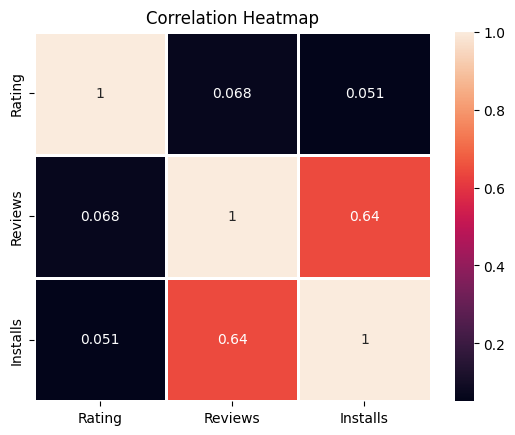

In [114]:
numeric_columns = ds.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, linewidth =1,linecolor="white")
plt.title('Correlation Heatmap')
plt.show()
